# Part 1: Find Predictors of Influence

<font face = "Tahoma" size = 3> 
The dataset for Part I can be found <a href = http://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network> here</a>. 
Use the training dataset only to build and validate your model. Each observation in the dataset describes two individuals, A and B.<br><br>
    There are 11 variables for each person based on Twitter activity, e.g., number of followers, retweets, network characteristics, etc. <br><br>Each observation shows whether A > B (Choice = “1”) or B > A (Choice = “0”). 


In [224]:
#Import libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import networkx as nx

<font face = "Tahoma" size = 3> Read data and feature processing

In [2]:
df = pd.read_csv('train.csv')
df.columns
df

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0,41765,185,1356,1529.643058,282.858500,76.809514,5.392171,104.438625,3307,...,1370,15143,6881.482996,5013.642295,22.683131,2.385538,18.420981,23958,21.324988,1413.825398
5496,1,112,243,5,1.445174,0.100503,0.100503,0.100503,0.603177,5,...,479,8,0.306073,0.306073,0.100503,0.100503,1.621981,1,49.000000,4969.000000
5497,0,15385,673,747,55.993546,22.321945,6.946233,0.341936,6.503977,202,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5498,0,265258,209,551,631.915946,457.648550,5.460985,0.100503,7.498126,2603,...,37601,22232,176.533716,42.330221,6.849227,1.345073,4.359865,696,234.338068,7168.464489


<font face = "Tahoma" size = 3> Business hypothesis
<br><br>
The features that might be indicative of social media influence are :
- Follower counts 
- Listed counts 
- Mentions received 
- Retweets received
- Number of posts
- Network features 1,2 and 3


In [3]:
diff_cols = ['Diff_follower_count', 'Diff_following_count', 'Diff_listed_count', 'Diff_mentions_received', 
        'Diff_retweets_received', 'Diff_mentions_sent', 'Diff_retweets_sent', 'Diff_posts', 
        'Diff_network_feature_1', 'Diff_network_feature_2', 'Diff_network_feature_3']

#Initialize difference columns
for i in range(len(diff_cols)):
    df[diff_cols[i]] = 0
for i in range(len(diff_cols)):
    df[diff_cols[i]] = df.iloc[i,i+1]-df.iloc[:,i+1+len(diff_cols)]

In [4]:
ratio_cols = ['Ratio_follower_count', 'Ratio_following_count', 'Ratio_listed_count', 'Ratio_mentions_received', 
        'Ratio_retweets_received', 'Ratio_mentions_sent', 'Ratio_retweets_sent', 'Ratio_posts', 
        'Ratio_network_feature_1', 'Ratio_network_feature_2', 'Ratio_network_feature_3']

#Initialize difference columns
for i in range(len(ratio_cols)):
    df[ratio_cols[i]] = 0
for i in range(len(ratio_cols)):
    df[ratio_cols[i]] = df.iloc[i,i+1]-df.iloc[:,i+1+len(ratio_cols)]

In [5]:
#Analysis on difference columns
df2 = pd.concat([pd.DataFrame(df['Choice']), df.iloc[:,23:]], axis = 1)
df2.head(10)

,Choice,Diff_follower_count,Diff_following_count,Diff_listed_count,Diff_mentions_received,Diff_retweets_received,Diff_mentions_sent,Diff_retweets_sent,Diff_posts,Diff_network_feature_1,...,Ratio_following_count,Ratio_listed_count,Ratio_mentions_received,Ratio_retweets_received,Ratio_mentions_sent,Ratio_retweets_sent,Ratio_posts,Ratio_network_feature_1,Ratio_network_feature_2,Ratio_network_feature_3
0,0,-34235,-28629,-1588,-7.739674,33.014855,-8.103828,-0.231920,-0.182770,21612,...,-28629,-1588,-7.739674,33.014855,-8.103828,-0.231920,-0.182770,21612,200.966213,-1905.893939
1,0,-39034,331,-1509,-32.804197,28.055277,-3.127174,-0.463839,5.735725,21515,...,331,-1509,-32.804197,28.055277,-3.127174,-0.463839,5.735725,21515,144.465841,-2920.515337
2,0,-3394,697,-105,6.956128,36.644505,-0.502699,0.000000,6.202843,21675,...,697,-105,6.956128,36.644505,-0.502699,0.000000,6.202843,21675,266.163182,-266.333333
3,0,-19334,-16458,-177,-565.184032,-353.294797,-27.451537,-7.067053,-25.295861,19916,...,-16458,-177,-565.184032,-353.294797,-27.451537,-7.067053,-25.295861,19916,253.027220,-1384.845634
4,1,-7326,-532,-80,-13.911042,33.417223,-6.664154,-1.019223,2.242799,21593,...,-532,-80,-13.911042,33.417223,-6.664154,-1.019223,2.242799,21593,227.996516,-1982.627907
5,0,-10919,-321,-373,-32.901689,31.075875,-19.547561,-1.761262,-5.454984,21550,...,-321,-373,-32.901689,31.075875,-19.547561,-1.761262,-5.454984,21550,169.064697,-2470.136364
6,0,-185388,178,-15016,-258.323050,-17.346347,-13.011400,-0.234262,-6.859127,20750,...,178,-15016,-258.323050,-17.346347,-13.011400,-0.234262,-6.859127,20750,103.510287,-5310.646186
7,1,-7892,469,-858,0.322181,34.910509,-1.498295,-0.495309,5.473196,21649,...,469,-858,0.322181,34.910509,-1.498295,-0.495309,5.473196,21649,70.963182,-4291.466667
8,1,-298440,628,-6108,-485.565556,-169.661668,-4.014709,-0.754036,3.730582,19657,...,628,-6108,-485.565556,-169.661668,-4.014709,-0.754036,3.730582,19657,200.526418,-3854.446569
9,0,-117685,-120,-9849,-182.064406,-30.311339,-11.194327,-2.466766,-4.127721,20887,...,-120,-9849,-182.064406,-30.311339,-11.194327,-2.466766,-4.127721,20887,90.954483,-5524.939774


In [28]:
#x = df2.loc[:,cols].values
#x = StandardScaler().fit_transform(x)
#pca = PCA(n_components=5)
#pcs = pca.fit_transform(x)
#pcs

<font face = "Tahoma" size = 3> Normalize data and create train test split
<br><br>

In [7]:
array3 = df2.loc[:,diff_cols].values
array3 = StandardScaler().fit_transform(array3)
df3 = pd.DataFrame(array3, columns = diff_cols)
df3 = df3.round(4)
df3.head(10)

,Diff_follower_count,Diff_following_count,Diff_listed_count,Diff_mentions_received,Diff_retweets_received,Diff_mentions_sent,Diff_retweets_sent,Diff_posts,Diff_network_feature_1,Diff_network_feature_2,Diff_network_feature_3
0,0.3013,-0.3411,0.2586,0.1012,0.1063,-0.2163,0.3989,0.1296,0.1938,0.0890,0.3313
1,0.2991,0.2376,0.2634,0.1002,0.1058,0.2952,0.2794,0.4343,0.1902,-0.4406,0.1475
2,0.3156,0.2449,0.3496,0.1018,0.1067,0.5650,0.5185,0.4584,0.1961,0.7001,0.6285
3,0.3082,-0.0979,0.3452,0.0790,0.0650,-2.2051,-3.1248,-1.1634,0.1304,0.5770,0.4258
4,0.3138,0.2203,0.3511,0.1010,0.1064,-0.0684,-0.0070,0.2545,0.1931,0.3424,0.3174
5,0.3121,0.2245,0.3331,0.1002,0.1061,-1.3926,-0.3895,-0.1419,0.1915,-0.2100,0.2291
6,0.2314,0.2345,-0.5654,0.0912,0.1009,-0.7208,0.3977,-0.2141,0.1616,-0.8245,-0.2857
7,0.3135,0.2403,0.3034,0.1015,0.1065,0.4626,0.2631,0.4208,0.1952,-1.1296,-0.1010
8,0.1790,0.2435,-0.0188,0.0822,0.0846,0.2040,0.1298,0.3311,0.1208,0.0849,-0.0218
9,0.2627,0.2286,-0.2483,0.0943,0.0995,-0.5340,-0.7532,-0.0735,0.1667,-0.9422,-0.3245


In [8]:
df3['Choice'] = df2['Choice']
X_train, y_train = df3[diff_cols].values , df3['Choice'].values

In [9]:
#Logistic regression to understand drivers of influence for A
# model = LogisticRegression(solver='liblinear', random_state=0)

#Stats model for p-values with all data
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.635451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5489
Method:                           MLE   Df Model:                           10
Date:                Mon, 14 Feb 2022   Pseudo R-squ.:                 0.08300
Time:                        00:43:26   Log-Likelihood:                -3495.0
converged:                       True   LL-Null:                       -3811.3
Covariance Type:            nonrobust   LLR p-value:                1.737e-129
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3411      0.079     -4.324      0.000      -0.496      -0.186
x2            -0.0055      0.

In [31]:
# performing predictions on the full datdaset
yhat = result.predict(X_train)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_train, prediction)
report = classification_report(y_train , prediction)

In [11]:
print(cm)

[[1443 1255]
 [ 578 2224]]


In [12]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      2698
           1       0.64      0.79      0.71      2802

    accuracy                           0.67      5500
   macro avg       0.68      0.66      0.66      5500
weighted avg       0.68      0.67      0.66      5500



In [13]:
from pretty_confusion_matrix import pp_matrix
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
cmap = 'OrRd'
pp_matrix(df_cm, cmap=cmap)

ModuleNotFoundError: No module named 'pretty_confusion_matrix'

In [15]:
# #Plot Confusion Matrix
# %matplotlib inline
# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

Variance contained in PCs:

In [16]:
sum(pca.explained_variance_ratio_)

NameError: name 'pca' is not defined

In [17]:
PC_df = pd.DataFrame(data=pcs, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
PC_df

NameError: name 'pcs' is not defined

Logistic Regression:

In [27]:
X = df3[cols]
y = df2.D_follower_count
y

NameError: name 'cols' is not defined

In [33]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
y = df['Choice'].values
x = df[df.columns[1:]].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=2000).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [44]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Confusion Matrix')
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.73
Confusion Matrix
[[529 300]
 [150 671]]


Confusion Matrix:

Text(0.5, 257.44, 'Predicted label')

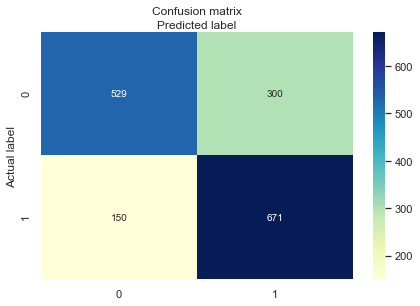

In [45]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Financial Value of Model

<font face = "Tahoma" size = 3> Assumptions
<br><br>
There is a difference between an influencer's value to product promotion versus a non-influencer and we hope to understand the financial difference between them based on the following assumptions
- Influencer Post gives 0.01 percent chance of follower purchasing product 
- Profit margin 10 dollars per unit
- One customer only buys one unit
- Influencer posts twice buying probability is 0.015 percent
- Without analytics 5 dollars to each person to tweet once
- With analytics 10 dollars to identified influencers to tweet twice and non influencers get no money

In [151]:
profit_margin = 10
payout = 5
payout_analytics = 10
prob_infl = 0.0001
prob_infl2 = 0.00015

In [152]:
def profit_analytics(pred,accurate,a_f, b_f):
    result = []
    for i in range(len(pred)):
        if(pred[i]==1.0 and accurate[i]==True): # actual influencer A
            pA = (a_f[i] * prob_infl2 * profit_margin) - payout_analytics
            result.append(pA)
        elif(pred[i]==0.0 and accurate[i]==True): # actual influencer B
            pB = (b_f[i] * prob_infl2 * profit_margin) - payout_analytics
            result.append(pB)
        else: # misclassified
            result.append(-payout_analytics)
    return result

In [153]:
df_profit = pd.DataFrame([y_test, y_pred, X_test[:,0], X_test[:,11]], index = ['actual', 'pred', 'A_follow', 'B_follow']).T
df_profit['Accurate'] = df_profit['actual'] == df_profit['pred']
df_profit.head()

,actual,pred,A_follow,B_follow,Accurate
0,1.0,0.0,366460.0,85138.0,False
1,1.0,0.0,3166413.0,489.0,False
2,1.0,1.0,1404323.0,4363.0,True
3,0.0,0.0,362.0,14838.0,True
4,1.0,1.0,48711.0,750.0,True


In [154]:
# calculate profit based on analytics
p_analytics = profit_analytics(df_profit["pred"], df_profit["Accurate"], df_profit["A_follow"], df_profit["B_follow"])
df_profit["Profit Analytics"] = p_analytics

In [155]:
# calculate profit based on perfect analytics
df_profit['dummy'] = (df_profit['actual']==df_profit['actual'])
perf_analytics = profit_analytics(df_profit["actual"], df_profit["dummy"], df_profit["A_follow"], df_profit["B_follow"])
df_profit['Profit PerfAnalytics'] = perf_analytics

In [156]:
# profit w/out analytics
df_profit['Profit NoAnalytics'] = (df_profit['actual']*df_profit['A_follow']*prob_infl*profit_margin)+(abs(df_profit['actual']-1)*df_profit['B_follow']*prob_infl*profit_margin)-(payout*2)
df_profit.head()

,actual,pred,A_follow,B_follow,Accurate,Profit Analytics,dummy,Profit PerfAnalytics,Profit NoAnalytics
0,1.0,0.0,366460.0,85138.0,False,-10.0000,True,539.6900,356.460
1,1.0,0.0,3166413.0,489.0,False,-10.0000,True,4739.6195,3156.413
2,1.0,1.0,1404323.0,4363.0,True,2096.4845,True,2096.4845,1394.323
3,0.0,0.0,362.0,14838.0,True,12.2570,True,12.2570,4.838
4,1.0,1.0,48711.0,750.0,True,63.0665,True,63.0665,38.711


In [157]:
# summarize results
print("Profit of Current Strategy: ", '${:,.2f}'.format(sum(df_profit['Profit NoAnalytics'])))
print("Profit using analytics: ", '${:,.2f}'.format(sum(df_profit['Profit Analytics'])))
print("Profit with perfect analytics: ", '${:,.2f}'.format(sum(df_profit['Profit PerfAnalytics'])))
print("Lift with our model: {}".format(sum(df_profit['Profit Analytics'])/sum(df_profit['Profit NoAnalytics'])))
print("Lift of perfect model: {}".format(sum(df_profit['Profit PerfAnalytics'])/sum(df_profit['Profit NoAnalytics'])))

Profit of Current Strategy:  $1,516,770.70
Profit using analytics:  $2,038,276.07
Profit with perfect analytics:  $2,283,406.05
Lift with our model: 1.343826114607488
Lift of perfect model: 1.5054391873579267


# Part 2: Building a Network of Influencers

In [237]:
# read in csv of tweets
jr = pd.read_csv("joeroganspotify.csv", encoding= 'latin1')
jr.head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers
0,0,#BobSaget #JoeRoganExperience #byeSpotify #Joe...,0,0,2022-02-14 05:47:54+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792
1,1,@Nachtzuster2 #byeSpotify #BobSaget #JoeRoganI...,0,0,2022-02-14 05:47:19+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792
2,2,@unhealthytruth Well no shit he is hanging aro...,0,0,2022-02-14 05:46:45+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792
3,3,RT @_HighArt_: #BobSaget #joerogan #timwilkins...,0,1,2022-02-14 03:22:59+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792
4,4,RT @_HighArt_: Looks like #timwilkins supports...,0,0,2022-02-14 02:35:42+00:00,CalmAnSensitive,27,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE,0,5


In [238]:
def interaction(message):
    interaction = []
    retweet = re.findall('RT \@[^\s\:]+',message)
    if retweet != []:
        userB = re.findall('\@[^\s\:]+',message)
        interaction.append(userB[0])
        interaction.append('Retweet')
    else:
        interaction.append('Self')
        interaction.append('Tweet')
    return interaction # userB, interaction

In [239]:
jr['Interaction'] = jr['Message'].apply(interaction)
jr.head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers,Interaction
0,0,#BobSaget #JoeRoganExperience #byeSpotify #Joe...,0,0,2022-02-14 05:47:54+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[Self, Tweet]"
1,1,@Nachtzuster2 #byeSpotify #BobSaget #JoeRoganI...,0,0,2022-02-14 05:47:19+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[Self, Tweet]"
2,2,@unhealthytruth Well no shit he is hanging aro...,0,0,2022-02-14 05:46:45+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[Self, Tweet]"
3,3,RT @_HighArt_: #BobSaget #joerogan #timwilkins...,0,1,2022-02-14 03:22:59+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[@_HighArt_, Retweet]"
4,4,RT @_HighArt_: Looks like #timwilkins supports...,0,0,2022-02-14 02:35:42+00:00,CalmAnSensitive,27,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE,0,5,"[@_HighArt_, Retweet]"


In [240]:
ntwrk = pd.DataFrame(jr['Interaction'].to_list(), columns = ['UserB', 'Interaction'])
ntwrk.insert(loc=0, column='UserA', value=jr['Username'])
ntwrk

,UserA,UserB,Interaction
0,_HighArt_,Self,Tweet
1,_HighArt_,Self,Tweet
2,_HighArt_,Self,Tweet
3,_HighArt_,@_HighArt_,Retweet
4,CalmAnSensitive,@_HighArt_,Retweet
...,...,...,...
2782,VeroniqueEB,Self,Tweet
2783,mphs95,@MuellerSheWrote,Retweet
2784,umamidon,Self,Tweet
2785,AmrMetawie,Self,Tweet


In [241]:
# create network with networkx
ntwrk['nodes'] = ntwrk[['UserA', 'UserB']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(ntwrk['nodes'])

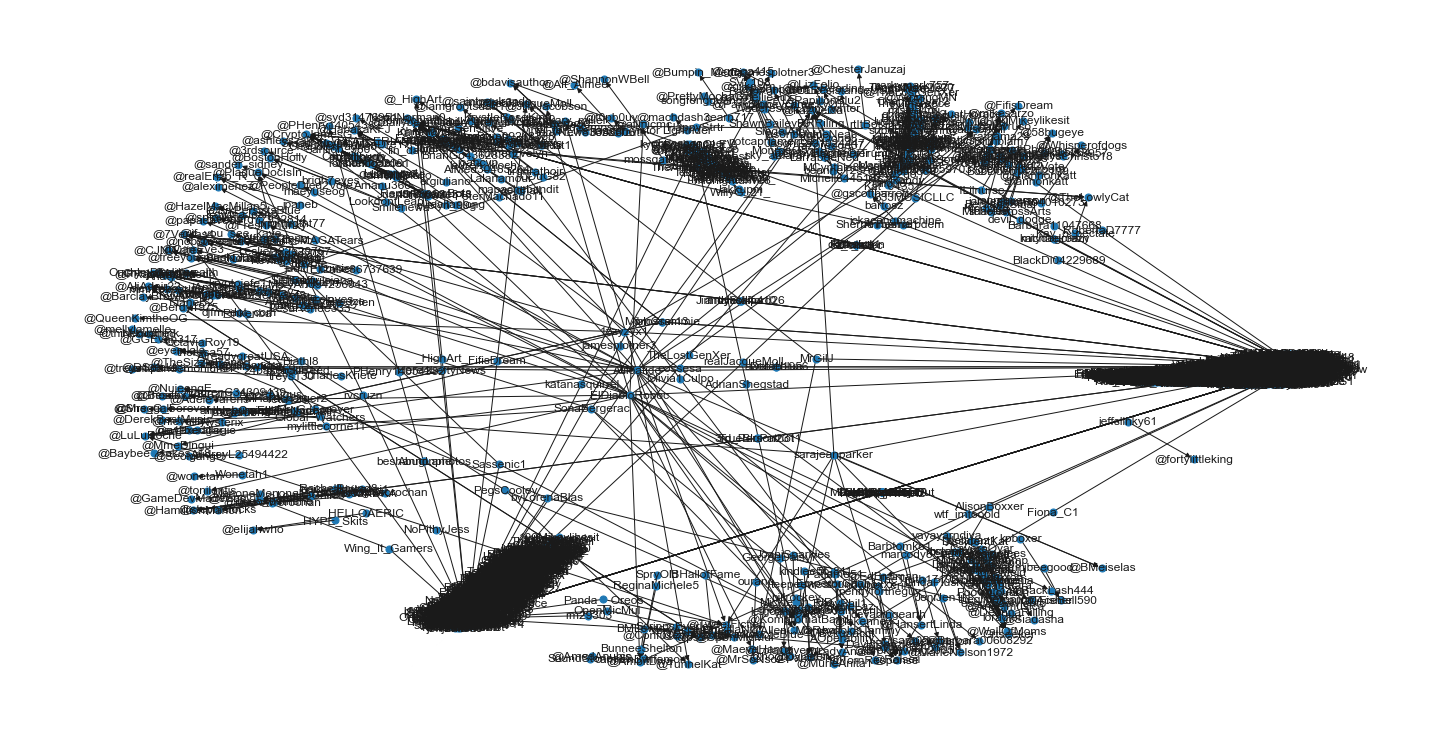

In [242]:
plt.figure(figsize = (20, 10))

nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()

In [233]:
degree = nx.degree_centrality(g)
between = nx.betweenness_centrality(g)
close = nx.closeness_centrality(g)

In [245]:
dfn = pd.DataFrame([degree, between,close]).T
dfn.reset_index(inplace = True)
dfn.columns = ['Username','Degree','Betweenness','Closeness']
jr.head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers,Interaction
0,0,#BobSaget #JoeRoganExperience #byeSpotify #Joe...,0,0,2022-02-14 05:47:54+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[Self, Tweet]"
1,1,@Nachtzuster2 #byeSpotify #BobSaget #JoeRoganI...,0,0,2022-02-14 05:47:19+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[Self, Tweet]"
2,2,@unhealthytruth Well no shit he is hanging aro...,0,0,2022-02-14 05:46:45+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[Self, Tweet]"
3,3,RT @_HighArt_: #BobSaget #joerogan #timwilkins...,0,1,2022-02-14 03:22:59+00:00,_HighArt_,9165,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE\n#BlackLiv...,1,5792,"[@_HighArt_, Retweet]"
4,4,RT @_HighArt_: Looks like #timwilkins supports...,0,0,2022-02-14 02:35:42+00:00,CalmAnSensitive,27,#DEFUNDTHEPOLICE\n#ABOLISHTHEPOLICE,0,5,"[@_HighArt_, Retweet]"


In [250]:
df_s = jr.drop(['Unnamed: 0','Message', 'Created At','User Description', 'Interaction'], axis = 1)
df_s.groupby('Username').sum()

,Tweet Favorite Count,Retweet Count,Likes,Following,Followers
Username,,,,,
007robertamac,0,1156,7231,766,444
01062021AD,0,1189,228378,9996,1148
0786Sher,4,2,2345,4996,923
100Mikeylikesit,2,1,34168,3590,3116
11dan21,0,1156,110687,431,303
...,...,...,...,...,...
z_cirelli,0,5048,177126,4788,268
z_tarot,0,55,24987,1450,1382
zismo64,0,11,21002,7237,6620
